# Лабораторная работа 1

*Зубарева Марина, РИМ-181226*

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [3]:
best_bar.head()

,company,bar_name,ref,rew_date,percent,company_loc,rate,bean_dtype,bean_orig
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [4]:

best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head()

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20. На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

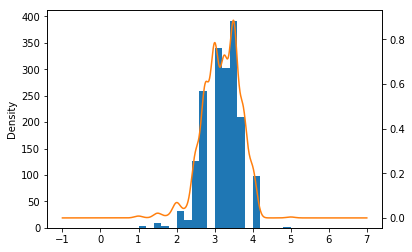

In [5]:
best_bar['rate'].plot(kind='hist', bins=20)
best_bar['rate'].plot(kind='kde', secondary_y=True)

plt.show()

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Шистограмму для такого типа построить не получиться.

In [6]:
type=best_bar['percent'].dtype
print (type)

object


Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

In [7]:
best_bar['percent']=best_bar['percent'].apply(lambda x: float(x.replace("%", '')))
best_bar.head()

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru


In [8]:
print (type)

object


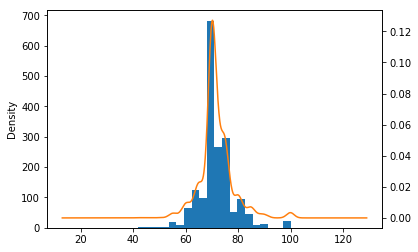

In [9]:
best_bar.percent.plot(kind='hist', bins=20)
best_bar.percent.plot(kind = 'kde', secondary_y=True)

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

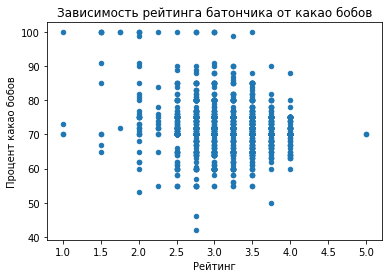

In [10]:
best_bar.plot(kind='scatter', x='rate', y='percent')
plt.title('Зависимость рейтинга батончика от какао бобов')
plt.xlabel('Рейтинг')
plt.ylabel('Процент какао бобов')
plt.show()

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

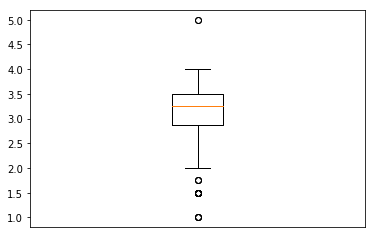

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rate, dtype: float64

In [11]:
plt.boxplot(best_bar['rate'])
plt.xticks([])
plt.show()
best_bar['rate'].describe()


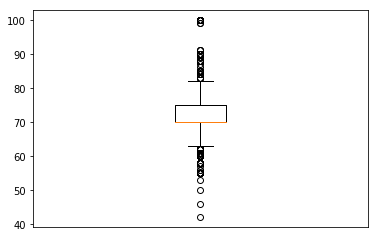

count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: percent, dtype: float64

In [12]:
plt.boxplot(best_bar['percent']) 
plt.xticks([])
plt.show()
best_bar['percent'].describe()

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [13]:
best_bar['bean_orig'].value_counts(). head()

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: bean_orig, dtype: int64

In [14]:
best_bar['bean_orig'].value_counts(). tail()

Dominican Rep., Bali     1
Dom. Rep., Madagascar    1
Madagascar & Ecuador     1
Venezuela, Trinidad      1
Ecuador, Costa Rica      1
Name: bean_orig, dtype: int64

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

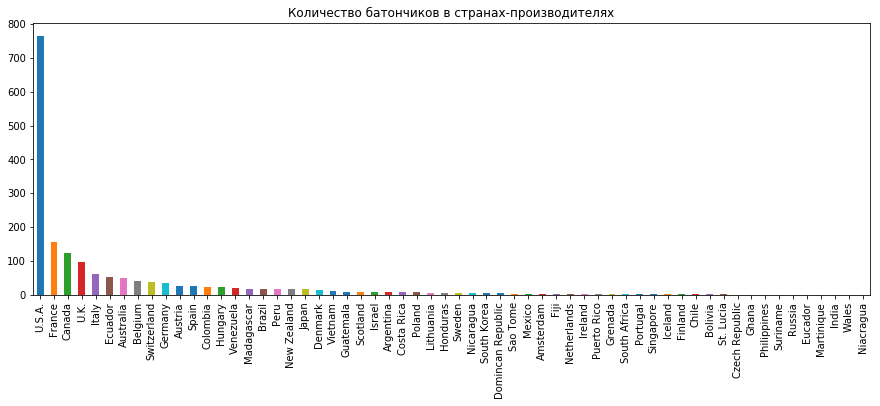

In [15]:
plt.figure(figsize=(15, 5))
best_bar['company_loc'].value_counts().plot(kind='bar')
plt.title('Количество батончиков в странах-производителях')
plt.show()

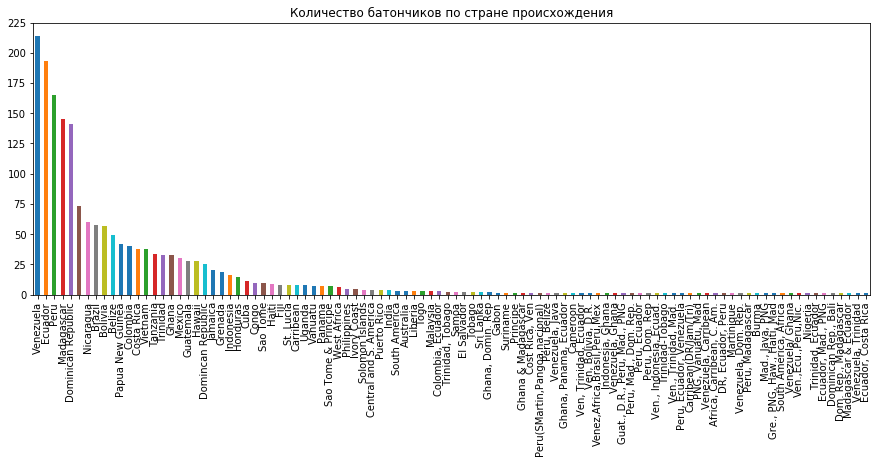

In [16]:
plt.figure(figsize=(15, 5))
best_bar['bean_orig'].value_counts().plot(kind='bar')
plt.title('Количество батончиков по стране происхождения')
plt.show()

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа. Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.

In [17]:
best_bar = best_bar.dropna(axis = 0)
best_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 0 to 1794
Data columns (total 4 columns):
company_loc    1794 non-null object
rate           1794 non-null float64
percent        1794 non-null float64
bean_orig      1794 non-null object
dtypes: float64(2), object(2)
memory usage: 70.1+ KB


Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [18]:
best_bar['bean_orig'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [19]:
best_bar = best_bar[best_bar['bean_orig'] != '\xa0']

In [20]:
best_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 1794
Data columns (total 4 columns):
company_loc    1721 non-null object
rate           1721 non-null float64
percent        1721 non-null float64
bean_orig      1721 non-null object
dtypes: float64(2), object(2)
memory usage: 67.2+ KB


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [21]:
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Domincan Republic',
       'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago', 'Peru

In [22]:
best_bar = best_bar.loc[(best_bar.bean_orig.value_counts() <= 5).values]
best_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 36 to 102
Data columns (total 4 columns):
company_loc    63 non-null object
rate           63 non-null float64
percent        63 non-null float64
bean_orig      63 non-null object
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [23]:
best_bar.bean_orig.unique()

array(['Vietnam', 'Madagascar', 'Venezuela', 'Peru', 'Ecuador',
       'Nicaragua', 'Tanzania', 'Bolivia', 'Dominican Republic',
       'Papua New Guinea', 'Indonesia', 'Ghana', 'Belize', 'Jamaica',
       'Grenada', 'Trinidad', 'Brazil', 'Mexico'], dtype=object)

Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

Text(0,0.5,' ')

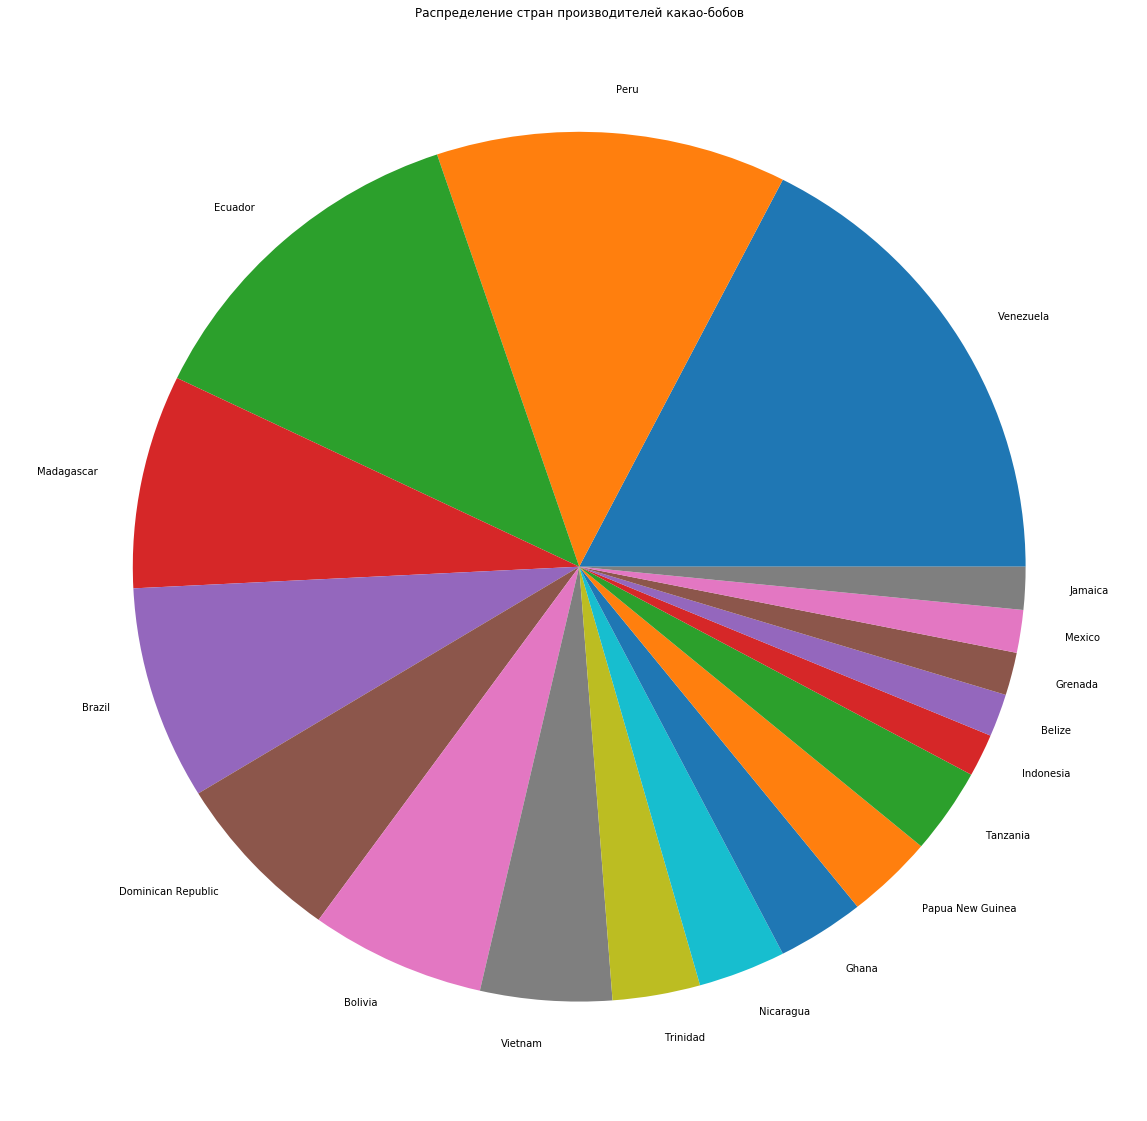

In [24]:
plt.figure(figsize=(20,20))
best_bar['bean_orig'].value_counts().plot(kind='pie')
plt.title('Распределение стран производителей какао-бобов')
plt.ylabel(' ')

## Попарные графики распределений

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from seaborn import pairplot


Построить попарные распределения для всех признаков.

In [31]:

subset = ['bean_orig', 'company_loc']
best_bar[subset] = best_bar[subset].astype('category')
   

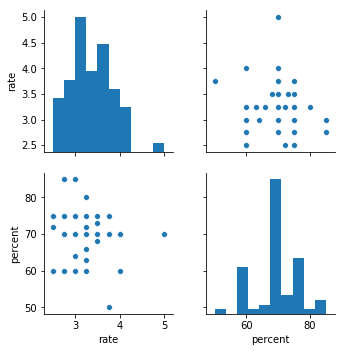

In [32]:

sns.pairplot(best_bar)
plt.show()      

In [33]:
best_bar.head

<bound method NDFrame.head of      company_loc  rate  percent           bean_orig
36        France  2.75     75.0             Vietnam
37        France  3.00     75.0          Madagascar
38        France  2.50     75.0           Venezuela
39        France  2.50     75.0                Peru
40   Netherlands  3.50     70.0             Ecuador
41   Netherlands  3.50     70.0           Nicaragua
42   Netherlands  3.50     70.0             Vietnam
43   Netherlands  3.50     70.0            Tanzania
44        U.S.A.  2.75     60.0           Nicaragua
45        U.S.A.  3.00     60.0                Peru
46        U.S.A.  2.50     60.0             Bolivia
47        U.S.A.  2.50     60.0                Peru
48        U.S.A.  2.75     60.0             Ecuador
49        U.S.A.  2.50     60.0           Venezuela
50        U.S.A.  3.00     60.0  Dominican Republic
51        U.S.A.  3.25     80.0             Bolivia
52        U.S.A.  3.00     60.0             Bolivia
53        U.S.A.  3.25     60.0   

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях

In [ ]:
for country in best_bar.groupby(['bean_orig']).mean().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)

In [ ]:

for country in best_bar.groupby(['bean_orig']).median().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)

Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [ ]:
for country in best_bar.groupby(['company_loc']).mean().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)

In [ ]:
for country in best_bar.groupby(['company_loc']).median().sort_values(by='rate', ascending=False).index[0:3].tolist():
    print(country)